In [1]:
pip install arch

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data= pd.read_csv('BTC-USD.csv')

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-26,2320.889893,2573.790039,2071.989990,2202.419922,2202.419922,1763480064
1,2017-05-27,2196.270020,2260.199951,1855.829956,2038.869995,2038.869995,1700480000
2,2017-05-28,2054.080078,2267.340088,2054.080078,2155.800049,2155.800049,1147139968
3,2017-05-29,2159.429932,2307.050049,2107.169922,2255.610107,2255.610107,994625024
4,2017-05-30,2255.360107,2301.959961,2124.570068,2175.469971,2175.469971,1443970048
...,...,...,...,...,...,...,...
2553,2024-05-22,70135.320313,70623.695313,68977.695313,69122.335938,69122.335938,32802561717
2554,2024-05-23,69121.304688,70041.273438,66356.953125,67929.562500,67929.562500,41895680979
2555,2024-05-24,67928.132813,69220.296875,66622.671875,68526.101563,68526.101563,29197308153
2556,2024-05-25,68526.921875,69579.320313,68515.820313,69265.945313,69265.945313,15473071741


In [5]:
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

data.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume,Range,Difference
0,2017-05-26,2320.889893,2573.790039,2071.989990,2202.419922,2202.419922,1763480064,501.800049,-118.469971
1,2017-05-27,2196.270020,2260.199951,1855.829956,2038.869995,2038.869995,1700480000,404.369995,-157.400025
2,2017-05-28,2054.080078,2267.340088,2054.080078,2155.800049,2155.800049,1147139968,213.260010,101.719971
3,2017-05-29,2159.429932,2307.050049,2107.169922,2255.610107,2255.610107,994625024,199.880127,96.180175
4,2017-05-30,2255.360107,2301.959961,2124.570068,2175.469971,2175.469971,1443970048,177.389893,-79.890136
5,2017-05-31,2187.189941,2311.080078,2145.570068,2286.409912,2286.409912,1544829952,165.510010,99.219971
6,2017-06-01,2288.330078,2448.389893,2288.330078,2407.879883,2407.879883,1653180032,160.059815,119.549805
7,2017-06-02,2404.030029,2488.550049,2373.320068,2488.550049,2488.550049,1317030016,115.229981,84.520020
8,2017-06-03,2493.719971,2581.909912,2423.570068,2515.350098,2515.350098,1514950016,158.339844,21.630127
9,2017-06-04,2547.790039,2585.889893,2452.540039,2511.810059,2511.810059,1355120000,133.349854,-35.979980


In [6]:
data.drop(columns=['Adj Close'], inplace=True)
data_btc_price = data.drop(columns=['Open','High','Low','Volume','Range','Difference'])

[(0.0, 2557.0)]

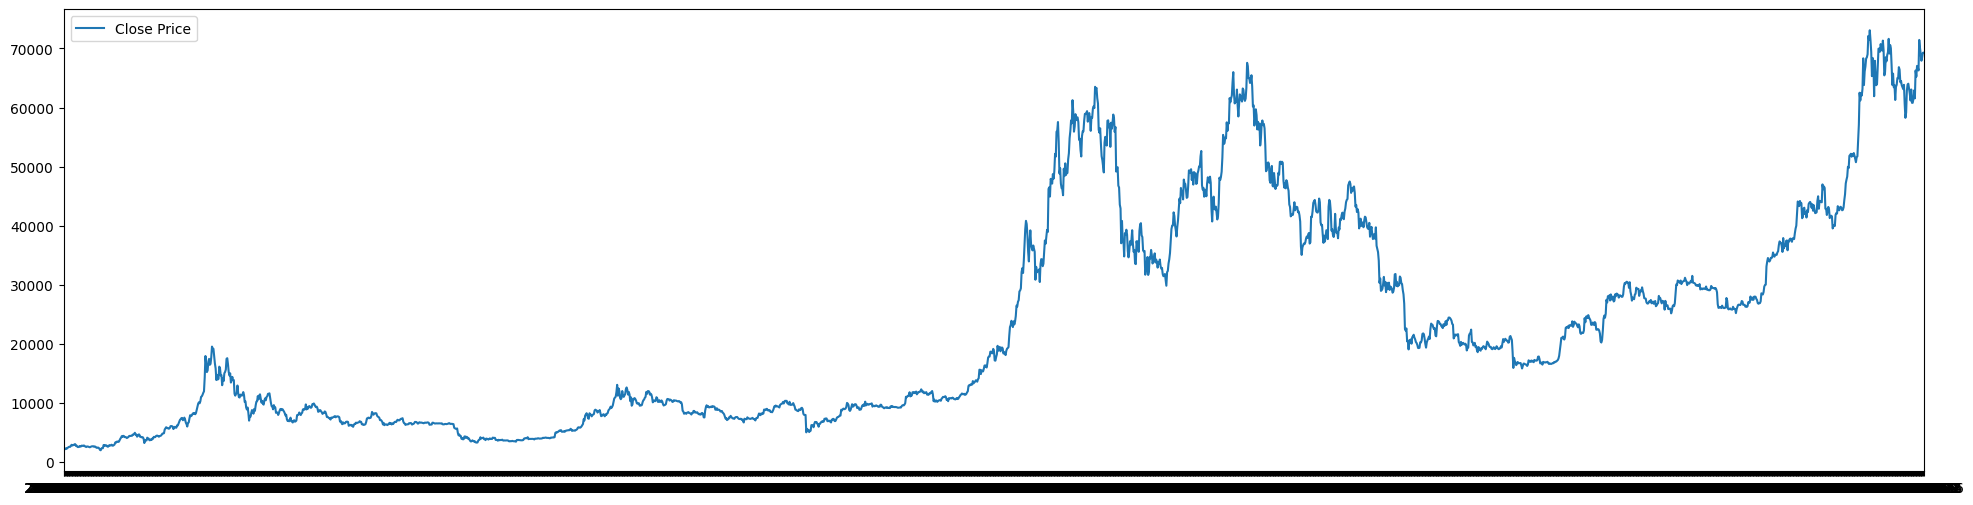

In [7]:
fig, axs = plt.subplots(figsize=(24,6))
axs.plot(data.Date, data.Close, label='Close Price')
axs.legend()
axs.set(xlim=(data.Date.min(), data.Date.max()))

In [8]:
data.describe()


,Open,High,Low,Close,Volume,Range,Difference
count,2558.000000,2558.000000,2558.000000,2558.000000,2.558000e+03,2558.000000,2558.000000
mean,22451.815323,22974.665201,21893.442533,22476.302803,2.380751e+10,1081.222668,24.487480
std,18001.481481,18429.342276,17528.181552,18018.162612,1.888178e+10,1293.129029,1007.108319
min,1932.619995,2058.770020,1843.030029,1929.819946,5.278560e+08,18.922608,-7563.996094
25%,7766.692871,7995.150635,7561.169312,7782.867431,9.650368e+09,246.045044,-213.270264
50%,16641.865235,16875.347656,16422.047852,16644.913086,2.090306e+10,579.682373,9.853760
75%,35079.457032,36070.939453,33881.118164,35236.384766,3.306322e+10,1456.169922,251.647949
max,73079.375000,73750.070313,71334.093750,73083.500000,3.509679e+11,12864.621094,7309.636719


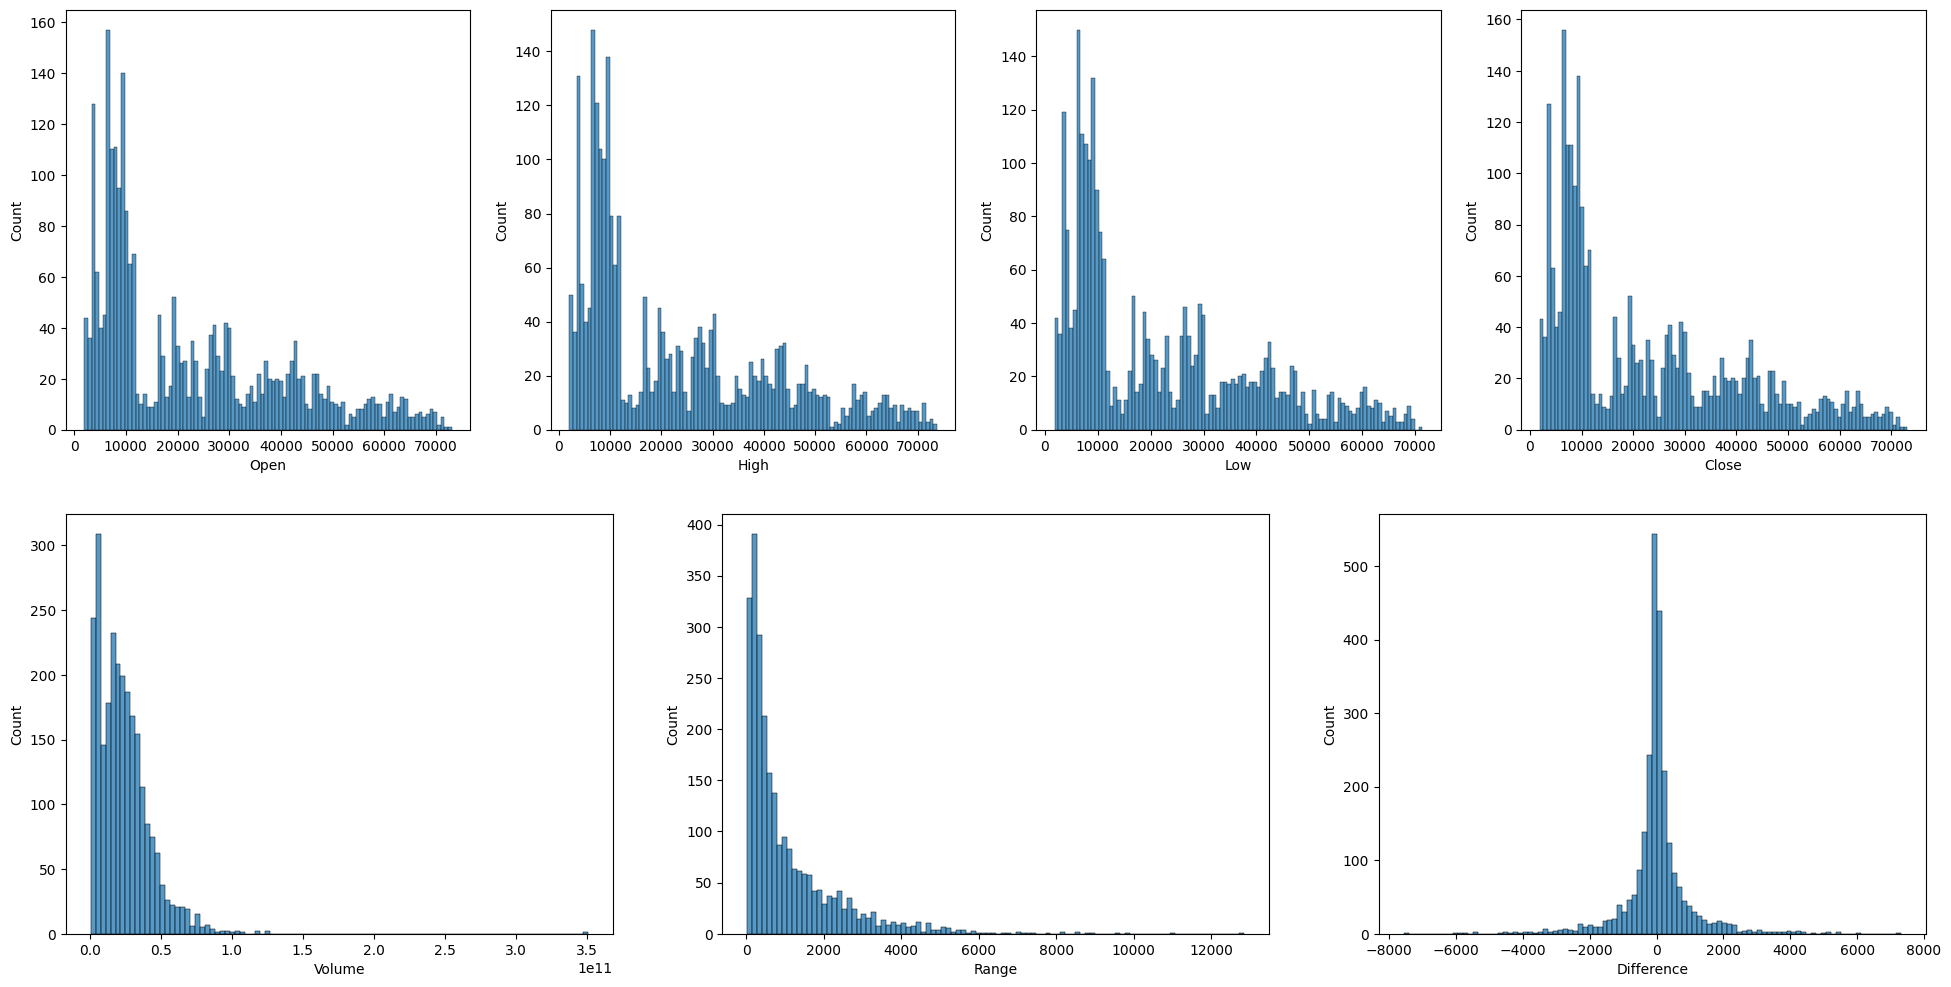

In [9]:
columns = [c for c in data.columns if c != 'Date']
plt.rcParams["figure.figsize"] = (24,12)
for i, col in enumerate(columns):
    if i<4:
        plt.subplot(2, 4, i+1)
    else:
        plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=100)
plt.show()


In [10]:
data

,Date,Open,High,Low,Close,Volume,Range,Difference
0,2017-05-26,2320.889893,2573.790039,2071.989990,2202.419922,1763480064,501.800049,-118.469971
1,2017-05-27,2196.270020,2260.199951,1855.829956,2038.869995,1700480000,404.369995,-157.400025
2,2017-05-28,2054.080078,2267.340088,2054.080078,2155.800049,1147139968,213.260010,101.719971
3,2017-05-29,2159.429932,2307.050049,2107.169922,2255.610107,994625024,199.880127,96.180175
4,2017-05-30,2255.360107,2301.959961,2124.570068,2175.469971,1443970048,177.389893,-79.890136
...,...,...,...,...,...,...,...,...
2553,2024-05-22,70135.320313,70623.695313,68977.695313,69122.335938,32802561717,1646.000000,-1012.984375
2554,2024-05-23,69121.304688,70041.273438,66356.953125,67929.562500,41895680979,3684.320313,-1191.742188
2555,2024-05-24,67928.132813,69220.296875,66622.671875,68526.101563,29197308153,2597.625000,597.968750
2556,2024-05-25,68526.921875,69579.320313,68515.820313,69265.945313,15473071741,1063.500000,739.023438


Number of jumps: 41
Intensity of jumps: 0.01602814698983581


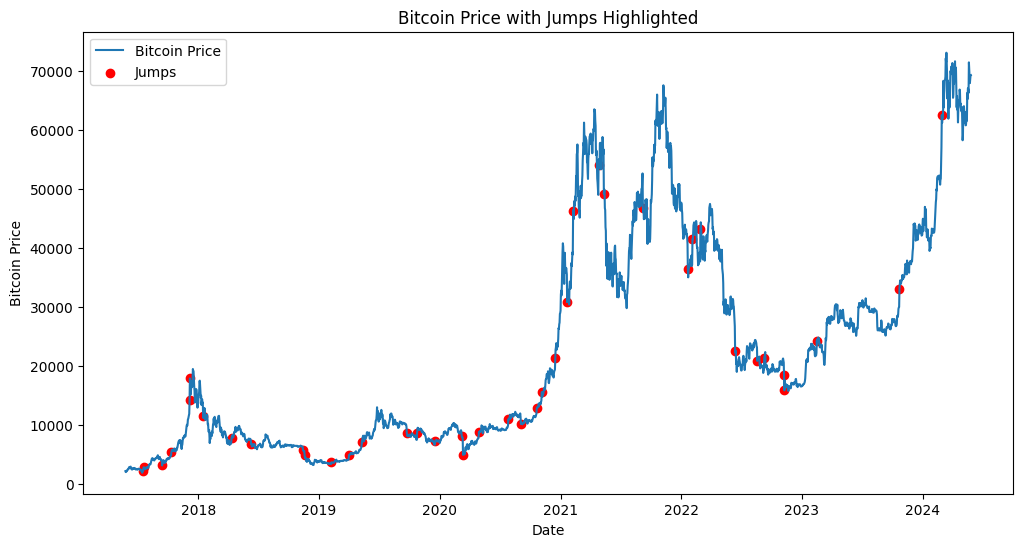

In [11]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

data_garch= pd.read_csv('BTC-USD.csv')

# Set the 'Date' column as the index
data_garch['Date'] = pd.to_datetime(data_garch['Date'])
data_garch.set_index('Date', inplace=True)

data_garch['returns'] = data_garch['Close'].pct_change().dropna()

# Rescale returns
data_garch['returns_rescaled'] = data_garch['returns'] * 100

# Fit a GARCH model on the rescaled returns
model = arch_model(data_garch['returns_rescaled'].dropna(), vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')
data_garch['volatility'] = garch_fit.conditional_volatility / 100  # Rescale volatility back

# Detect jumps
data_garch['standardized_residuals'] = data_garch['returns'] / data_garch['volatility']
#choose 3 std for deviation to be extreme
jump_threshold = 3
data_garch['jumps'] = np.abs(data_garch['standardized_residuals']) > jump_threshold

# Calculate intensity and count of jumps
jump_count = data_garch['jumps'].sum()
jump_intensity = data_garch['jumps'].mean()

print(f"Number of jumps: {jump_count}")
print(f"Intensity of jumps: {jump_intensity}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data_garch.index, data_garch['Close'], label='Bitcoin Price')
plt.scatter(data_garch.index[data_garch['jumps']], data_garch['Close'][data_garch['jumps']], color='red', label='Jumps')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price with Jumps Highlighted')
plt.legend()
plt.show()


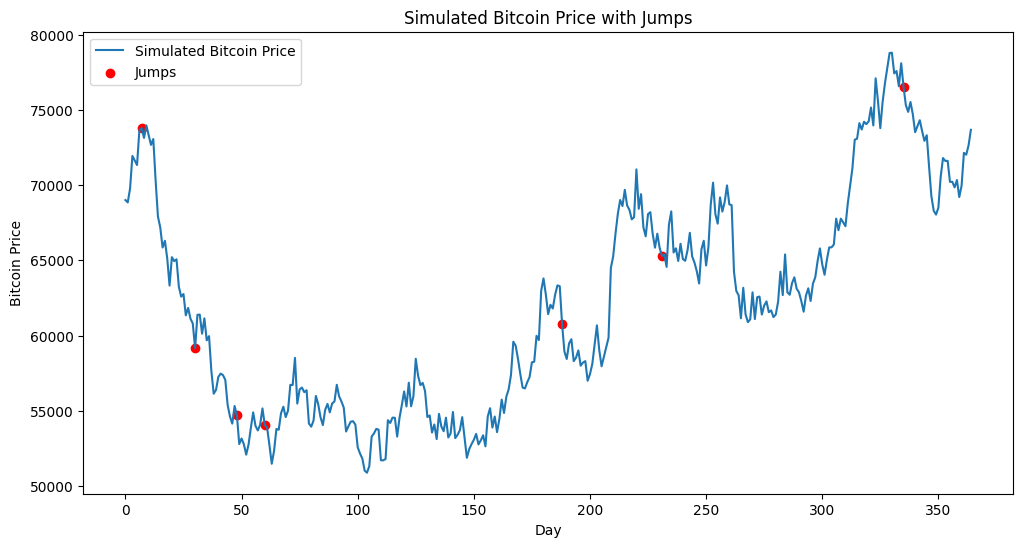

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
lambda_per_day = jump_intensity  # Intensity of jumps per day
num_days = 365  # Number of trading days in a year
price_start = 69000  # Starting Bitcoin price
mu = 0.0005  # Daily drift
sigma = 0.02  # Daily volatility
jump_magnitude_mean = 0.00  # Mean jump magnitude
jump_magnitude_std = 0.02  # Std dev of jump magnitude

# Simulate daily returns
np.random.seed(42)
normal_returns = np.random.normal(mu, sigma, num_days)

# Simulate jump occurrences using Poisson distribution
jump_occurrences = np.random.poisson(lambda_per_day, num_days)
jumps_each_day = (jump_occurrences > 0).astype(int)

# Simulate jump magnitudes
jump_magnitudes = np.random.normal(jump_magnitude_mean, jump_magnitude_std, num_days) * jumps_each_day

# Combine normal returns and jumps
total_returns = normal_returns + jump_magnitudes

# Simulate price path
price_path = np.zeros(num_days)
price_path[0] = price_start
for t in range(1, num_days):
    price_path[t] = price_path[t-1] * (1 + total_returns[t])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(price_path, label='Simulated Bitcoin Price')
plt.scatter(np.arange(num_days)[jumps_each_day > 0], price_path[jumps_each_day > 0], color='red', label='Jumps')
plt.xlabel('Day')
plt.ylabel('Bitcoin Price')
plt.title('Simulated Bitcoin Price with Jumps')
plt.legend()
plt.show()


In [13]:
elec_data = pd.read_csv('elecERCOT.csv')

In [14]:
data

,Date,Open,High,Low,Close,Volume,Range,Difference
0,2017-05-26,2320.889893,2573.790039,2071.989990,2202.419922,1763480064,501.800049,-118.469971
1,2017-05-27,2196.270020,2260.199951,1855.829956,2038.869995,1700480000,404.369995,-157.400025
2,2017-05-28,2054.080078,2267.340088,2054.080078,2155.800049,1147139968,213.260010,101.719971
3,2017-05-29,2159.429932,2307.050049,2107.169922,2255.610107,994625024,199.880127,96.180175
4,2017-05-30,2255.360107,2301.959961,2124.570068,2175.469971,1443970048,177.389893,-79.890136
...,...,...,...,...,...,...,...,...
2553,2024-05-22,70135.320313,70623.695313,68977.695313,69122.335938,32802561717,1646.000000,-1012.984375
2554,2024-05-23,69121.304688,70041.273438,66356.953125,67929.562500,41895680979,3684.320313,-1191.742188
2555,2024-05-24,67928.132813,69220.296875,66622.671875,68526.101563,29197308153,2597.625000,597.968750
2556,2024-05-25,68526.921875,69579.320313,68515.820313,69265.945313,15473071741,1063.500000,739.023438


In [15]:

# Convert Date column to datetime if it's not already
elec_data['Date'] = pd.to_datetime(elec_data['Date'])

# Ensure the 'zone' column is standardized to lower case for consistency
elec_data['zone'] = elec_data['zone'].str.lower()

# Debugging: Check unique values in the 'zone' column
print("Unique zones in the data:", elec_data['zone'].unique())

# Filter the dataframe to include only "lz_west" (standardized form)
filtered_elec_data = elec_data[elec_data['zone'] == 'lz_west']

# Debugging: Check if the filtered data is empty
print("Filtered data is empty:", filtered_elec_data.empty)

# Set the 'Date' column as the index
filtered_elec_data.set_index('Date', inplace=True)

# Drop non-numeric columns before resampling
filtered_elec_data = filtered_elec_data.drop(columns=['zone'])

# Resample the data to daily frequency, aggregating by mean price
daily_elec_data = filtered_elec_data.resample('D').mean().reset_index()

print(daily_elec_data)

Unique zones in the data: ['lz_aen' 'lz_cps' 'lz_houston' 'lz_lcra' 'lz_north' 'lz_raybn' 'lz_south'
 'lz_west']
Filtered data is empty: False
           Date       price
0    2018-01-01   51.275000
1    2018-01-02   75.466667
2    2018-01-03   56.805000
3    2018-01-04   52.030000
4    2018-01-05   36.055833
...         ...         ...
2333 2024-05-22   31.673750
2334 2024-05-23   31.650417
2335 2024-05-24  119.332500
2336 2024-05-25   27.689583
2337 2024-05-26   16.478750

[2338 rows x 2 columns]


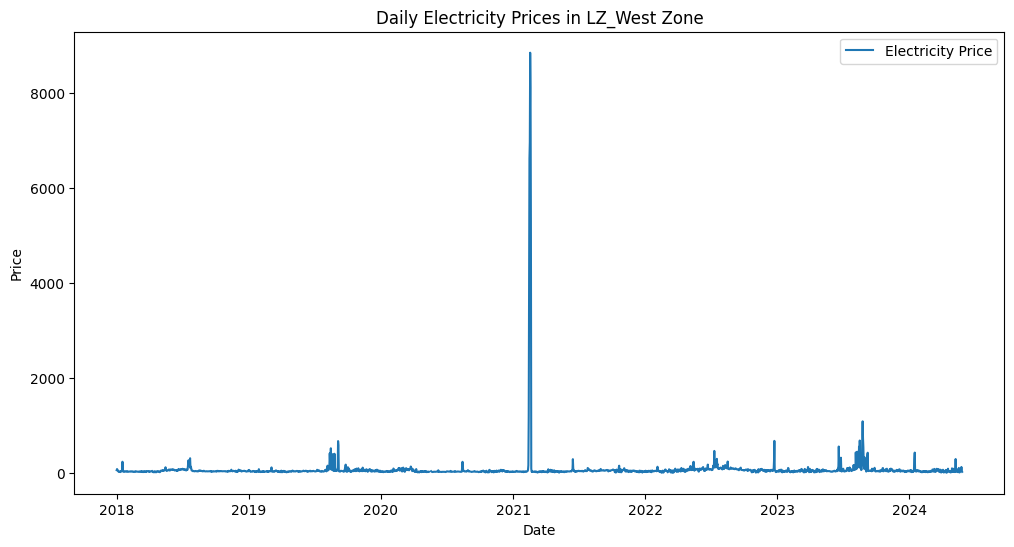

In [16]:


# Plotting the daily electricity prices
plt.figure(figsize=(12, 6))
plt.plot(daily_elec_data['Date'], daily_elec_data['price'], label='Electricity Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Electricity Prices in LZ_West Zone')
plt.legend()
plt.show()


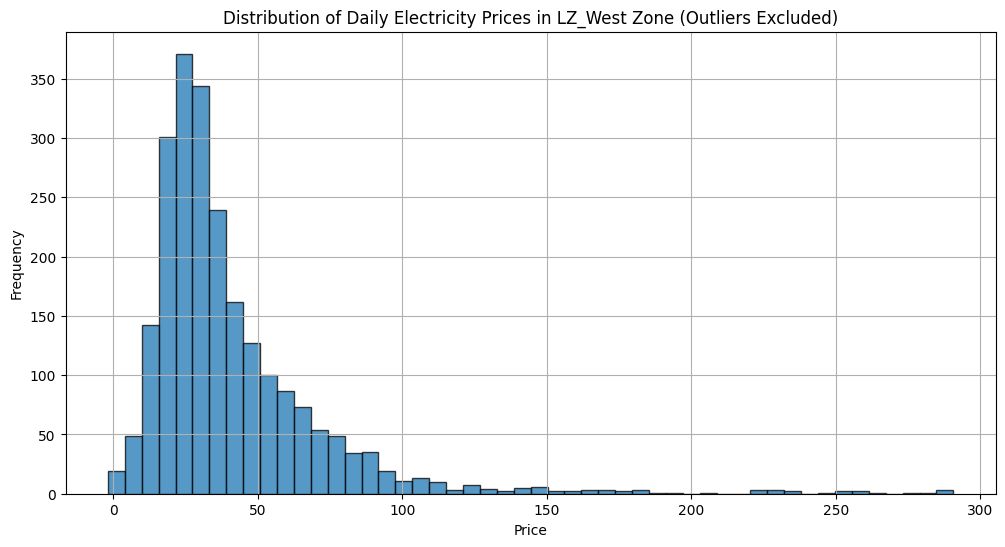

In [17]:

# Define a threshold to exclude outliers
price_threshold = 300  # Set threshold below the known outlier value (e.g., $1000)

# Filter out the outliers
filtered_data = daily_elec_data[daily_elec_data['price'] < price_threshold]

# Generate a distribution plot for the filtered price data
plt.figure(figsize=(12, 6))
plt.hist(filtered_data['price'], bins=50, alpha=0.75, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Electricity Prices in LZ_West Zone (Outliers Excluded)')
plt.grid(True)
plt.show()


In [18]:
filtered_data.describe()

,Date,price
count,2303,2303.000000
mean,2021-03-11 05:05:07.946157056,41.049181
min,2018-01-01 00:00:00,-1.910000
25%,2019-07-31 12:00:00,22.629375
50%,2021-03-16 00:00:00,32.030000
75%,2022-10-13 12:00:00,49.684167
max,2024-05-26 00:00:00,290.640833
std,NaN,32.609911


In [19]:
data_btc_price

,Date,Close
0,2017-05-26,2202.419922
1,2017-05-27,2038.869995
2,2017-05-28,2155.800049
3,2017-05-29,2255.610107
4,2017-05-30,2175.469971
...,...,...
2553,2024-05-22,69122.335938
2554,2024-05-23,67929.562500
2555,2024-05-24,68526.101563
2556,2024-05-25,69265.945313


In [20]:

daily_elec_data

,Date,price
0,2018-01-01,51.275000
1,2018-01-02,75.466667
2,2018-01-03,56.805000
3,2018-01-04,52.030000
4,2018-01-05,36.055833
...,...,...
2333,2024-05-22,31.673750
2334,2024-05-23,31.650417
2335,2024-05-24,119.332500
2336,2024-05-25,27.689583


Correlation matrix:
          price     Close
price  1.000000 -0.005695
Close -0.005695  1.000000


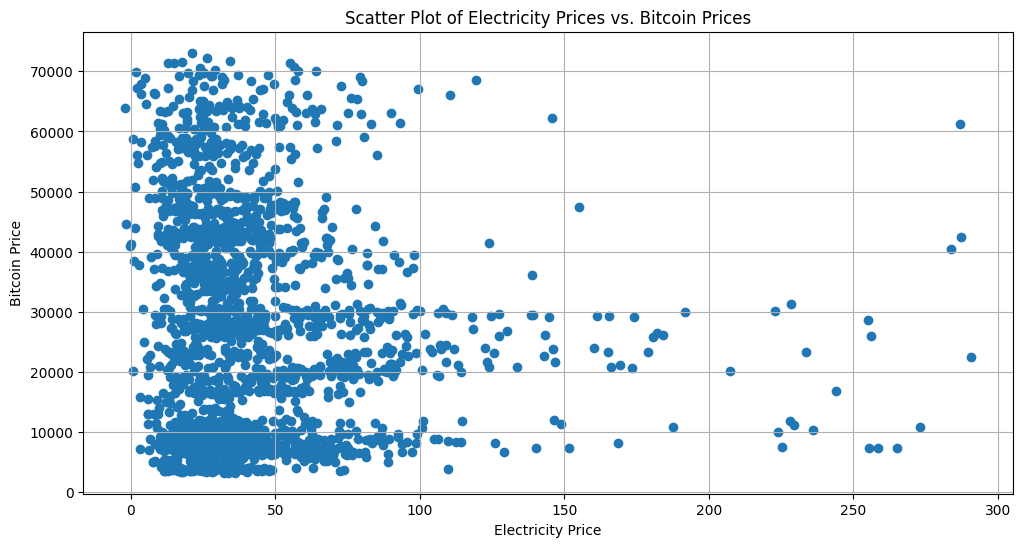

In [28]:

# Convert Date columns to datetime if necessary
daily_elec_data['Date'] = pd.to_datetime(daily_elec_data['Date'])
data_btc_price['Date'] = pd.to_datetime(data_btc_price['Date'])



daily_elec_data_indexed = daily_elec_data.set_index('Date')
data_btc_price_indexed = data_btc_price.set_index('Date')

filtered_elec_data = daily_elec_data[daily_elec_data['price'] < price_threshold]
filtered_elec_data_indexed = daily_elec_data_indexed[daily_elec_data_indexed['price'] < 300]


# Align the DataFrames by their Date indices
combined_data = pd.concat([filtered_elec_data_indexed, data_btc_price_indexed], axis=1, join='inner')

# Calculate the correlation between the aligned DataFrames
correlation = combined_data[['price', 'Close']].corr()

print("Correlation matrix:")
print(correlation)

# Plot the relationship for visual inspection
plt.figure(figsize=(12, 6))
plt.scatter(combined_data['price'], combined_data['Close'])
plt.xlabel('Electricity Price')
plt.ylabel('Bitcoin Price')
plt.title('Scatter Plot of Electricity Prices vs. Bitcoin Prices')
plt.grid(True)
plt.show()

Yearly Correlations:
2018: -0.05496826987525363
2019: 0.31876056744002296
2020: -0.12708064982510642
2021: 0.05143155423465197
2022: -0.29953813209733643
2023: -0.009088299771378134
2024: 0.011818000847309893


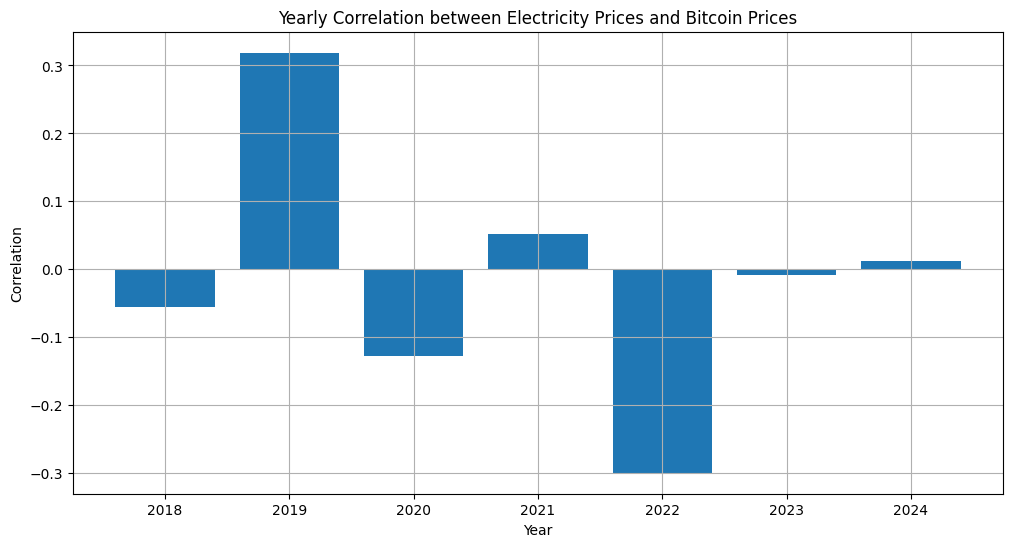

In [36]:

# Segment data by year
combined_data['Year'] = combined_data.index.year

# Calculate the correlation for each year and store the results
yearly_correlations = {}
for year in combined_data['Year'].unique():
    year_data = combined_data[combined_data['Year'] == year]
    correlation = year_data[['price', 'Close']].corr().iloc[0, 1]
    yearly_correlations[year] = correlation

# Print yearly correlations
print("Yearly Correlations:")
for year, corr in yearly_correlations.items():
    print(f"{year}: {corr}")

# Plot the correlation for each year
years = list(yearly_correlations.keys())
correlations = list(yearly_correlations.values())

plt.figure(figsize=(12, 6))
plt.bar(years, correlations)
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Yearly Correlation between Electricity Prices and Bitcoin Prices')
plt.grid(True)
plt.show()

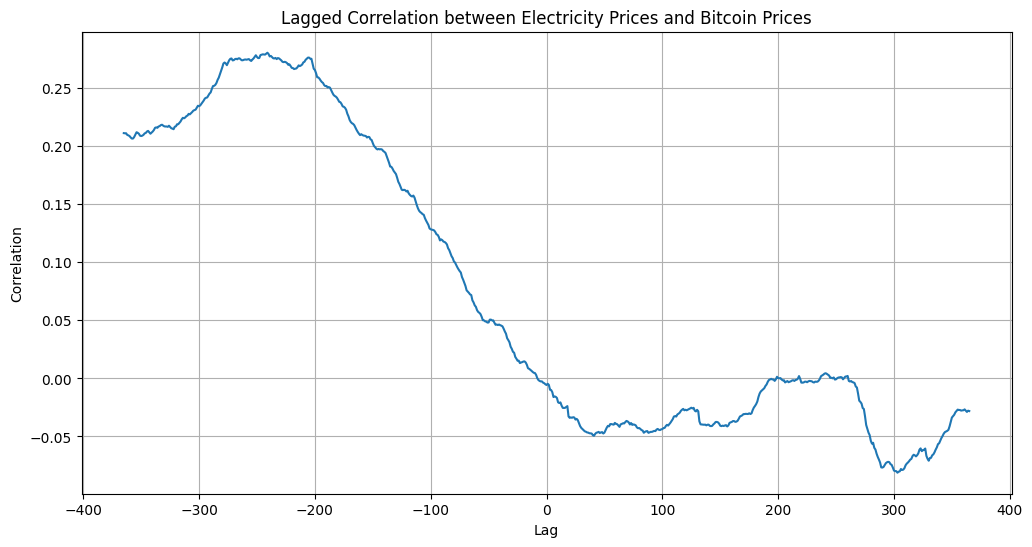

In [35]:
# Function to calculate lagged correlation
def lagged_correlation(df, lag):
    return df['price'].shift(lag).corr(df['Close'])

# Calculate lagged correlations
max_lag = 365
correlations = [lagged_correlation(combined_data, lag) for lag in range(-max_lag, max_lag + 1)]

# Plot the lagged correlations
plt.figure(figsize=(12, 6))
plt.plot(range(-max_lag, max_lag + 1), correlations)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Lagged Correlation between Electricity Prices and Bitcoin Prices')
plt.grid(True)
plt.show()


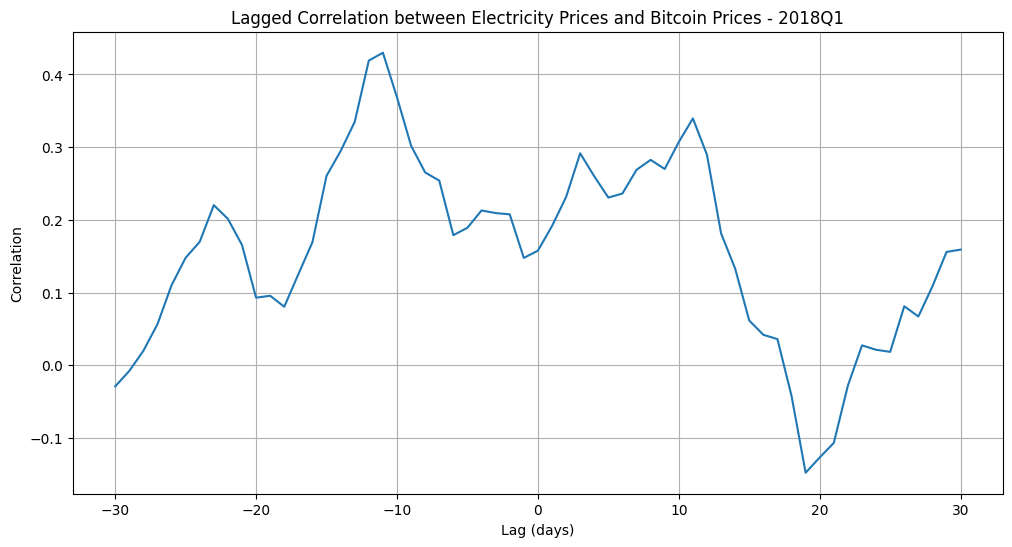

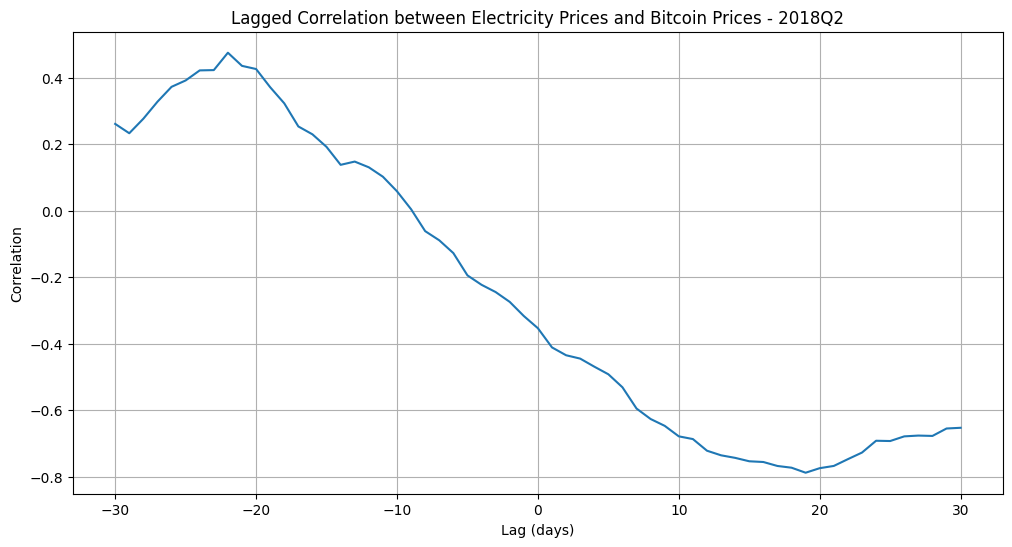

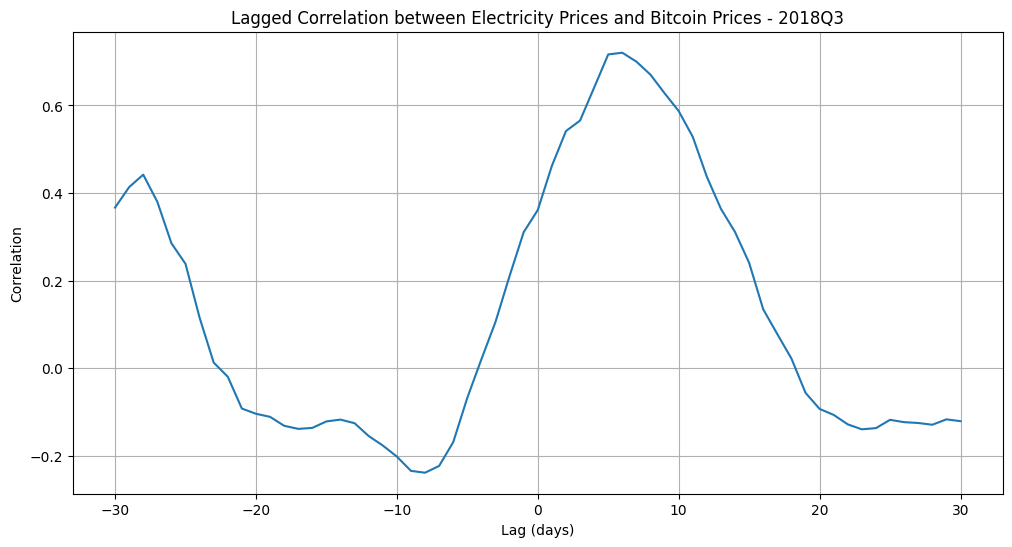

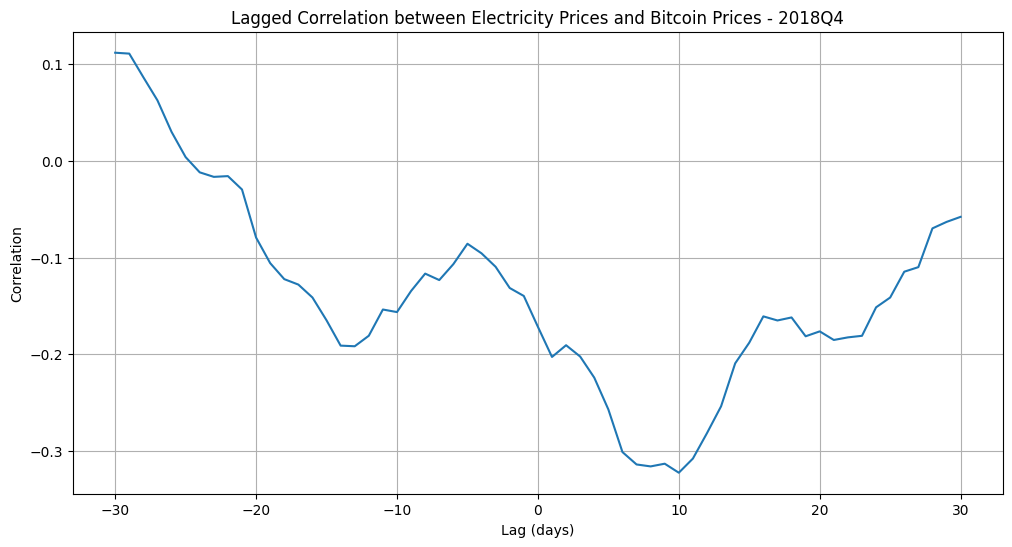

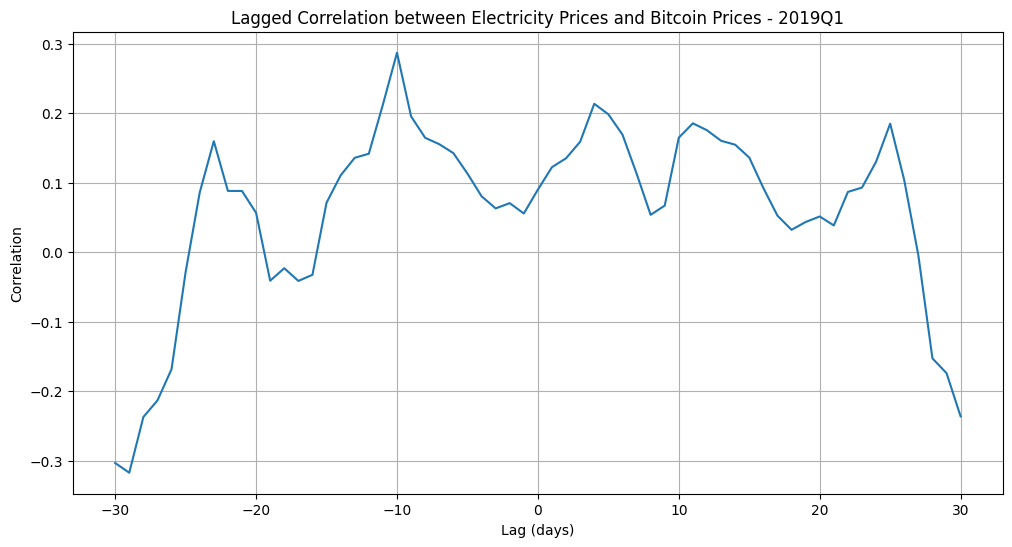

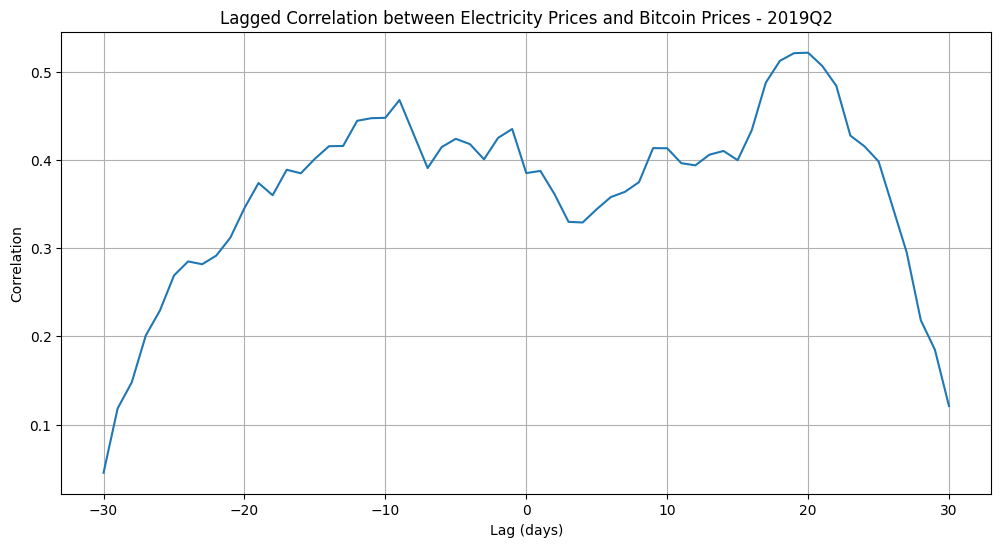

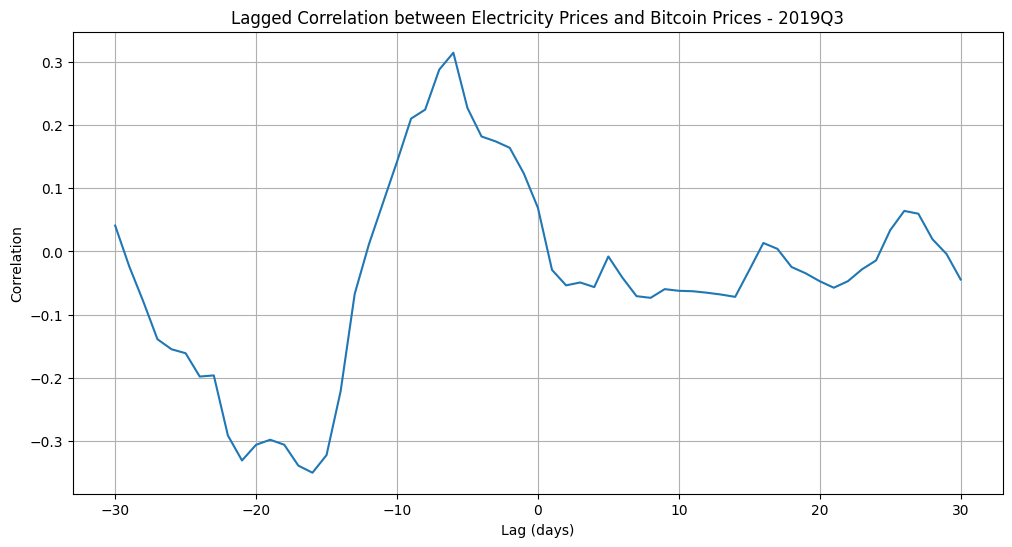

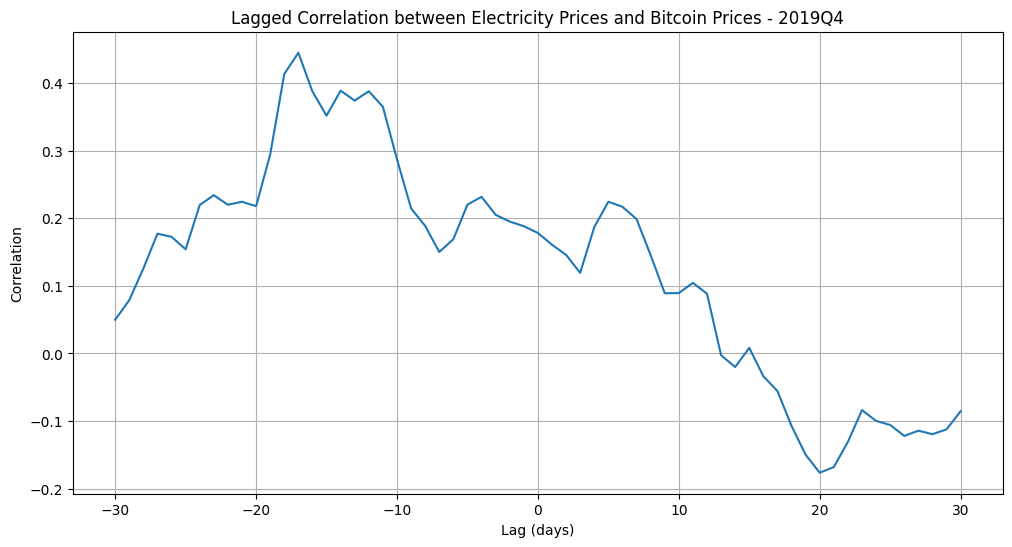

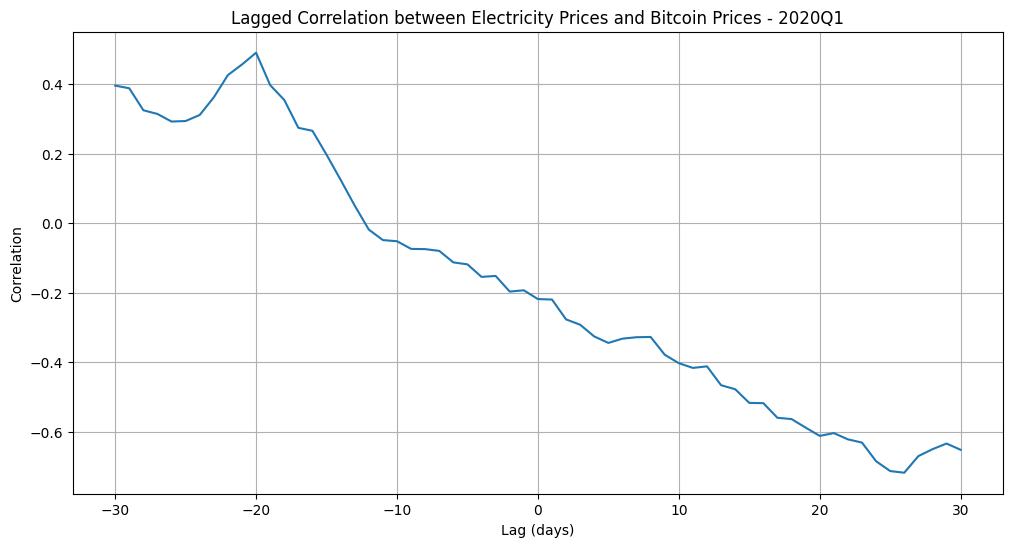

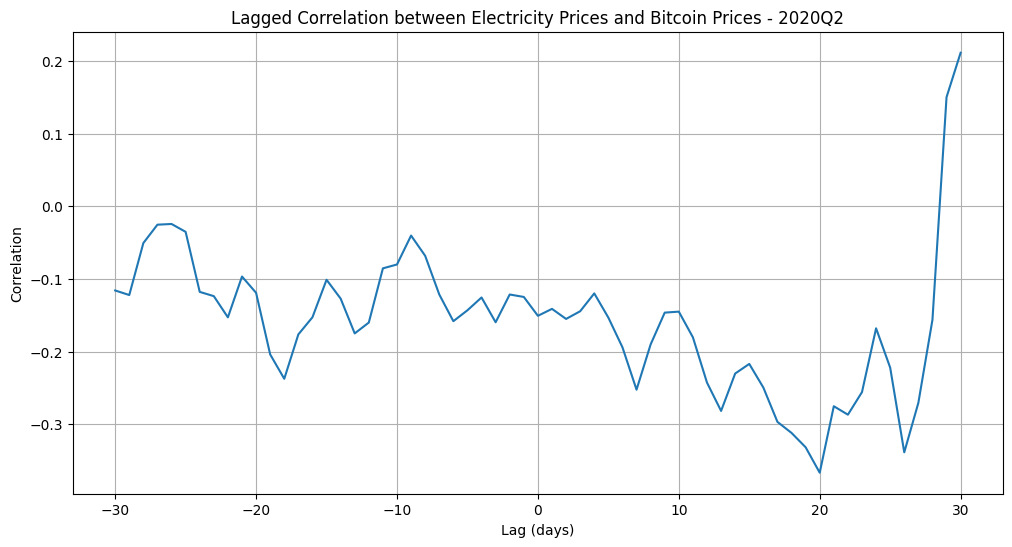

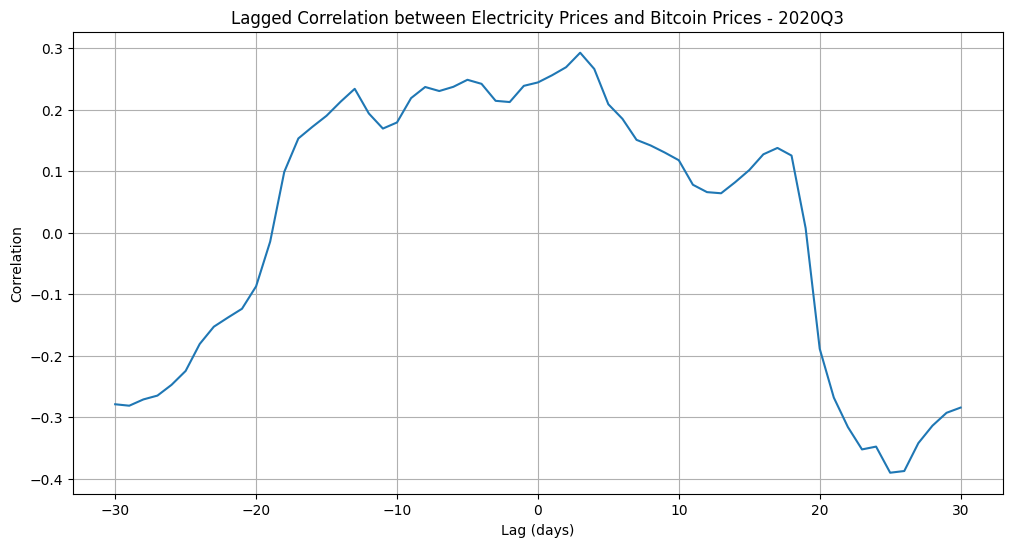

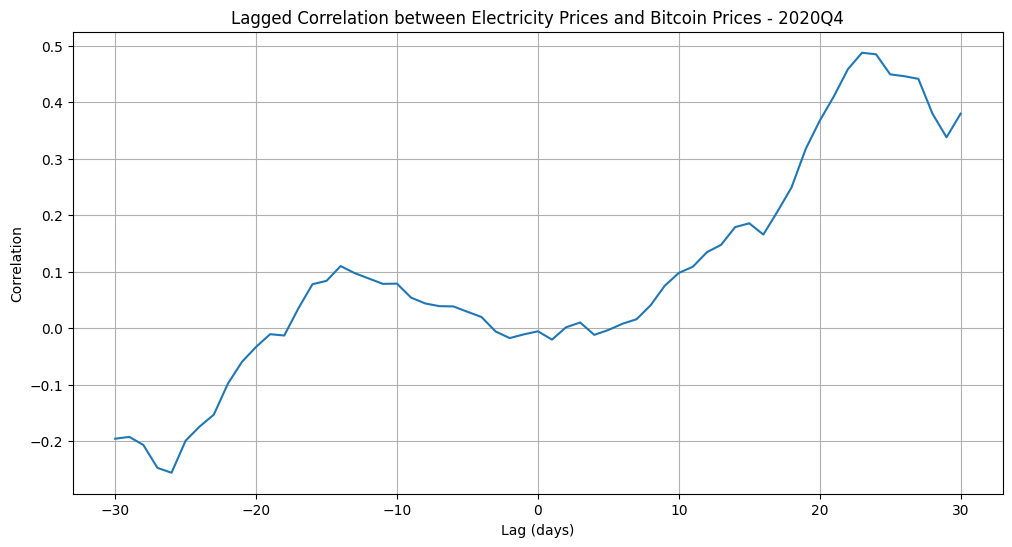

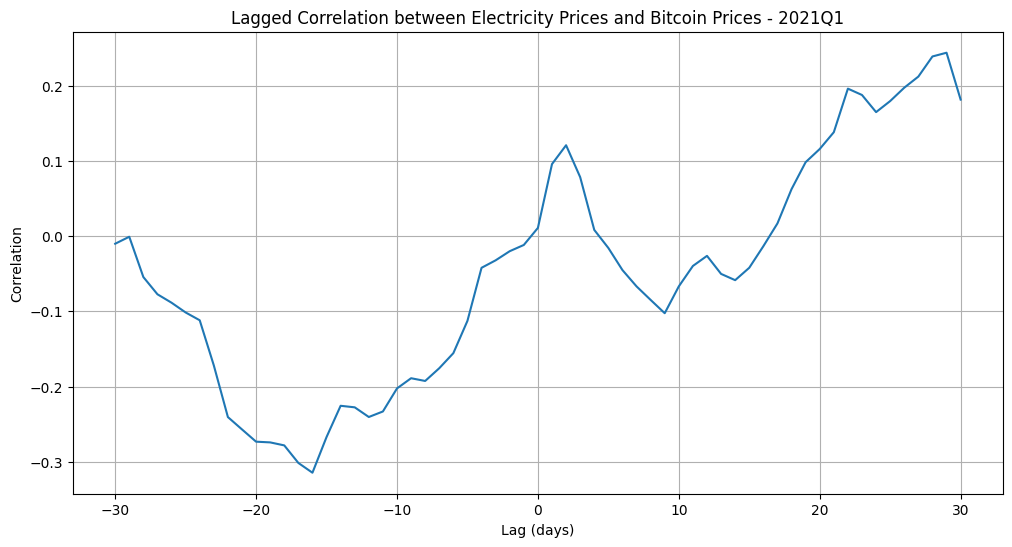

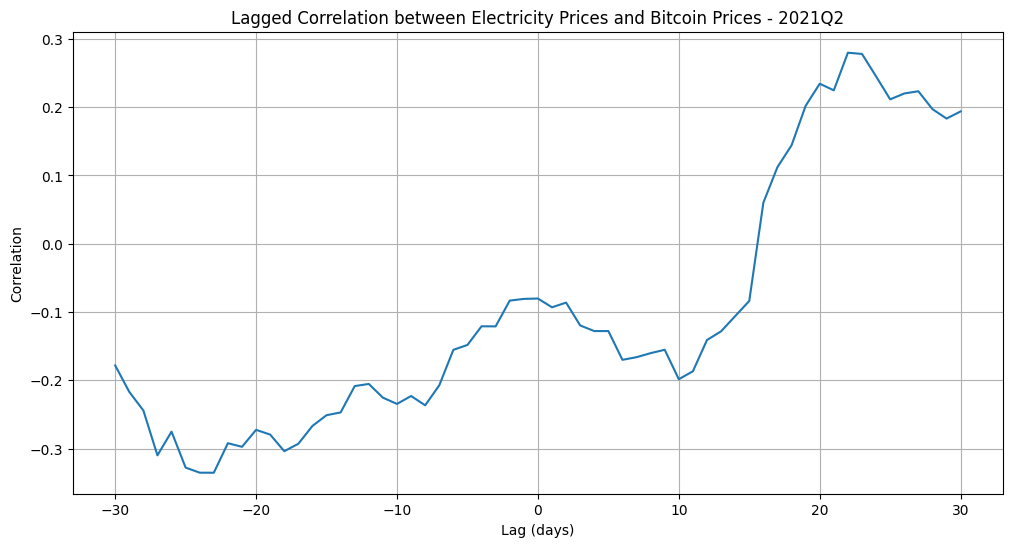

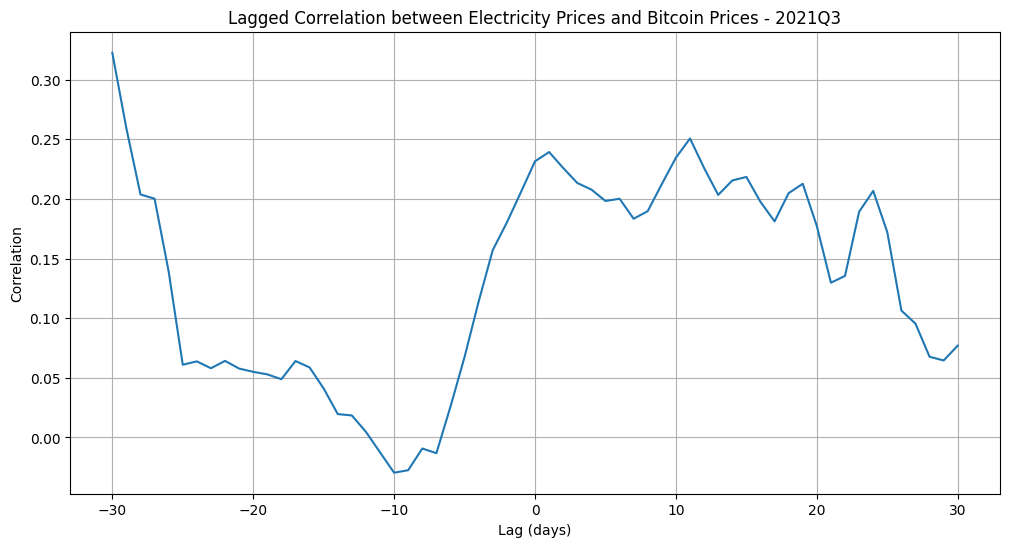

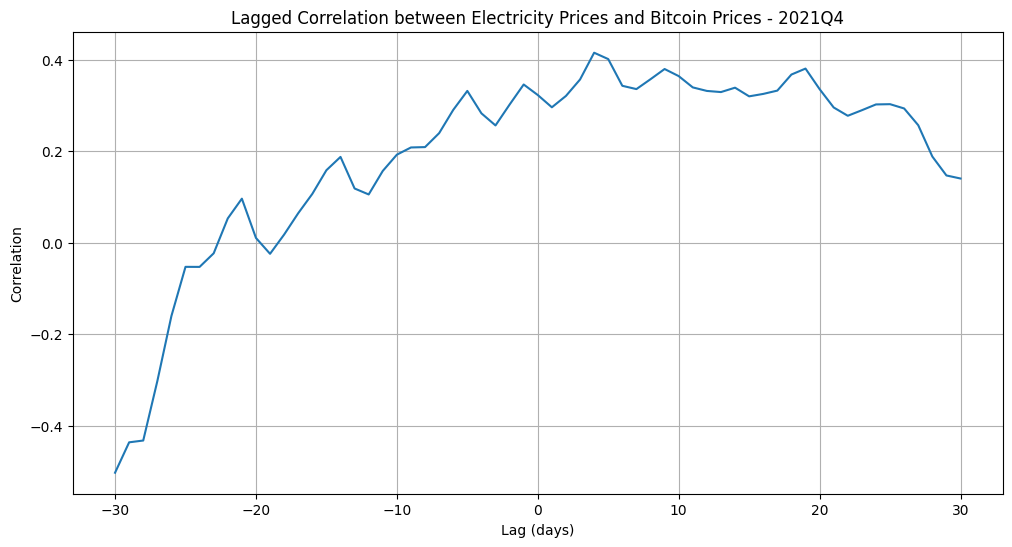

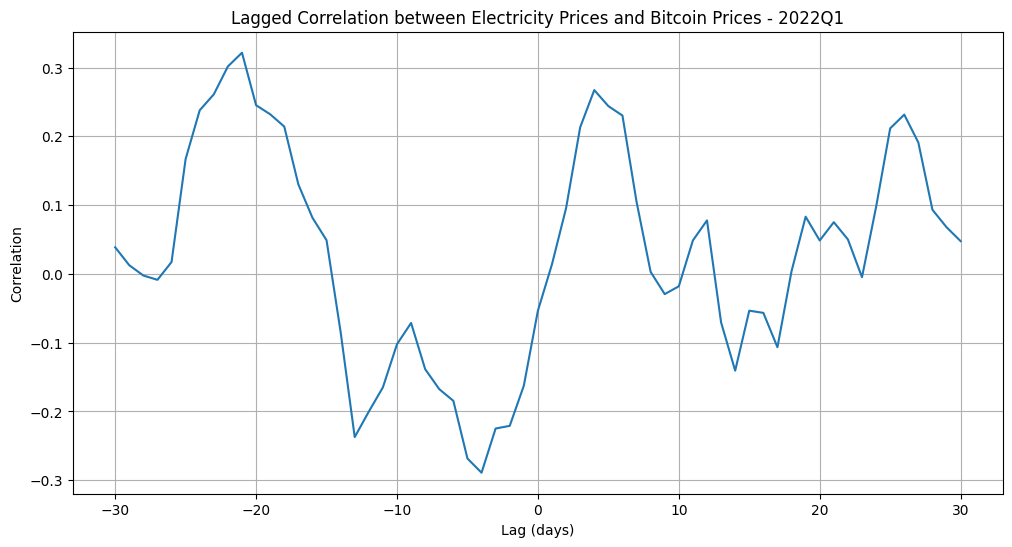

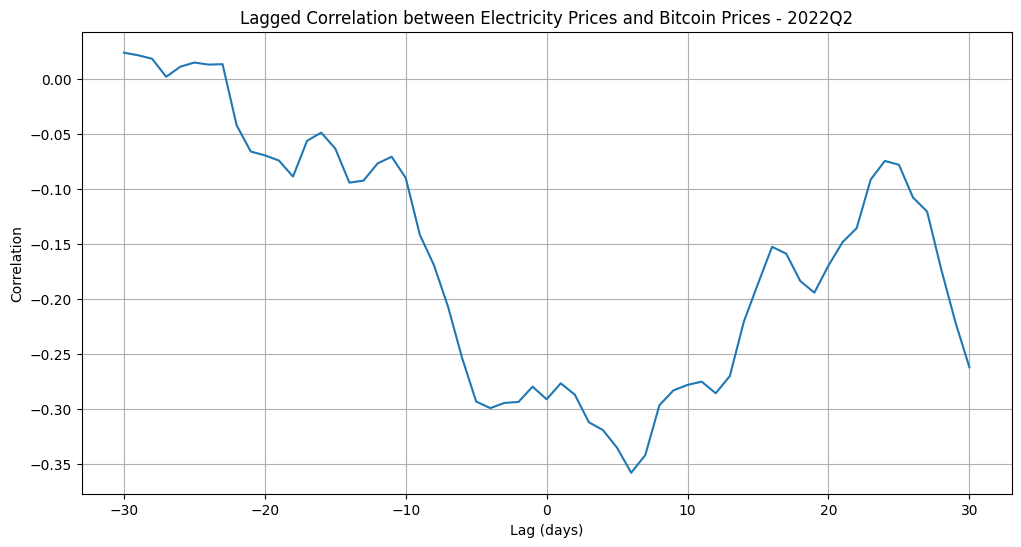

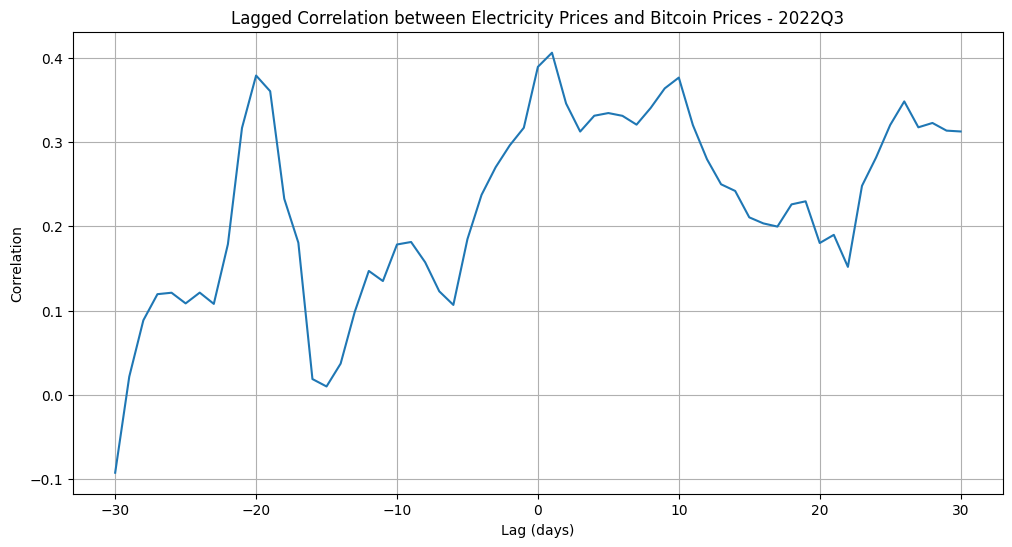

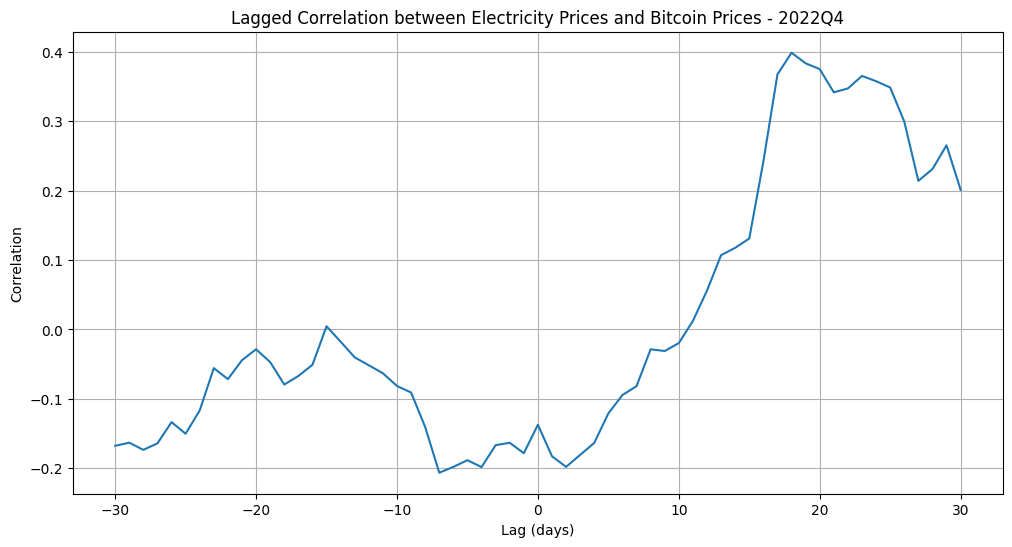

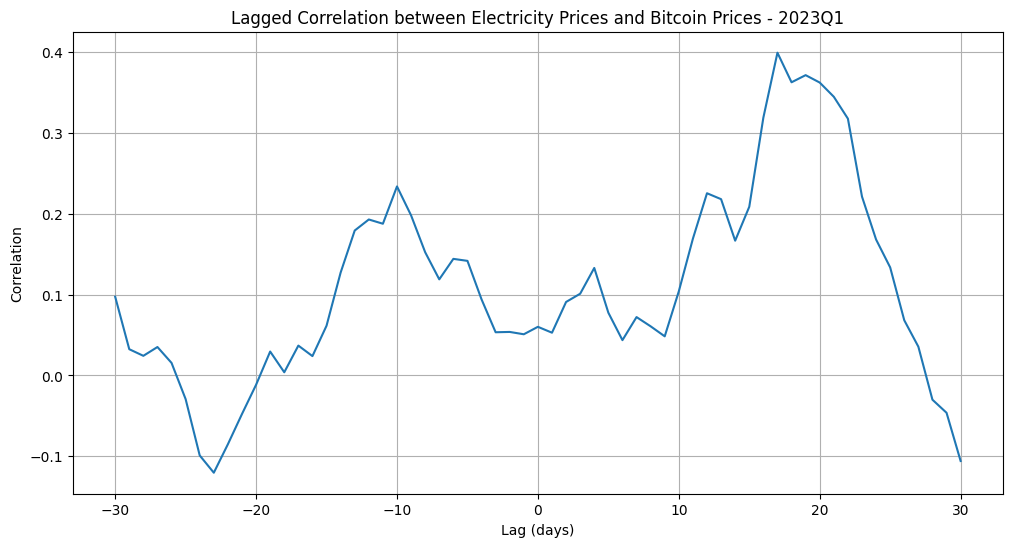

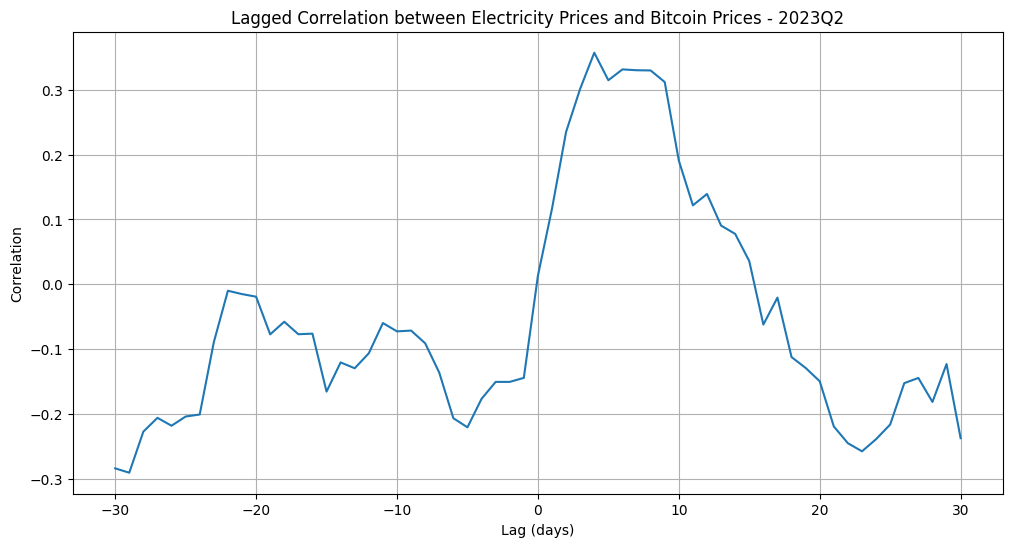

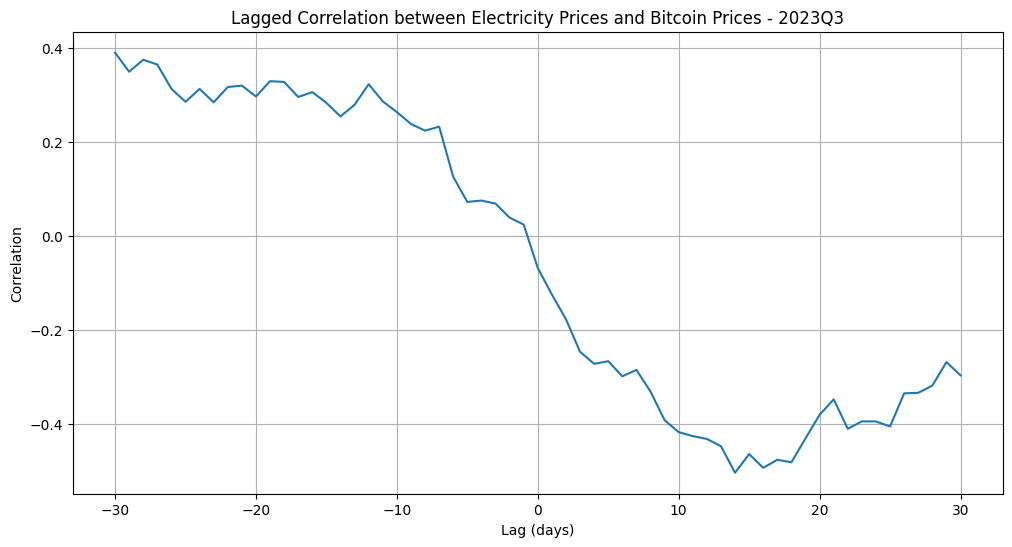

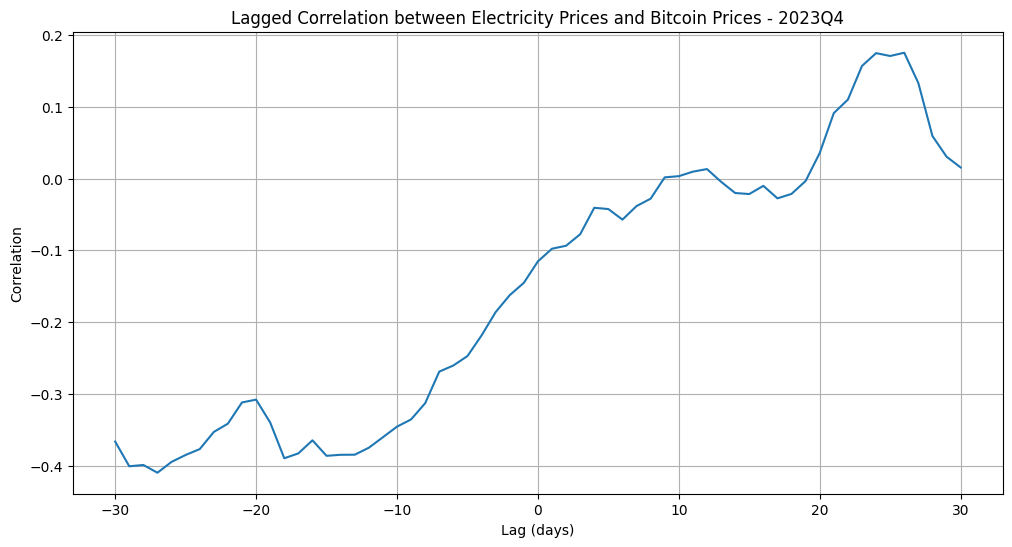

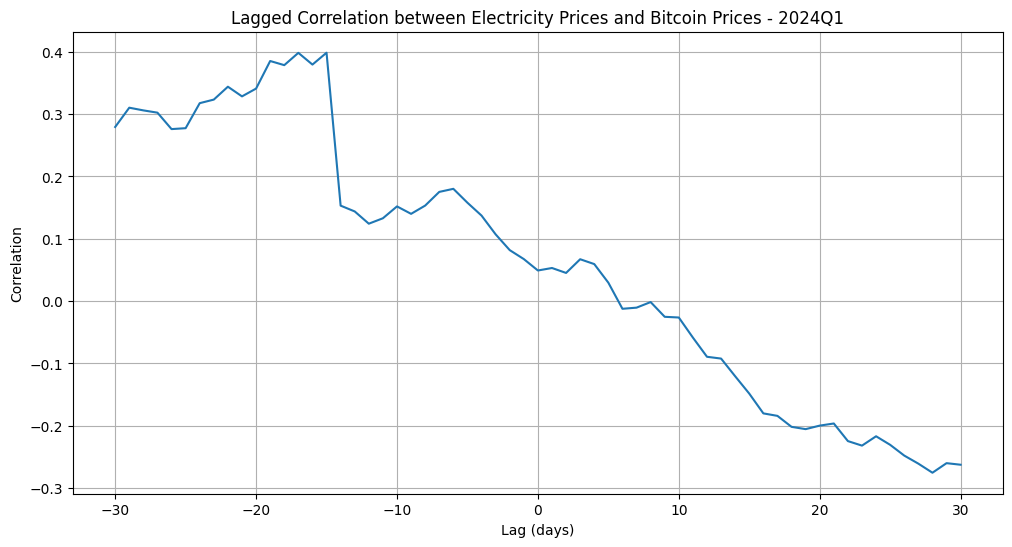

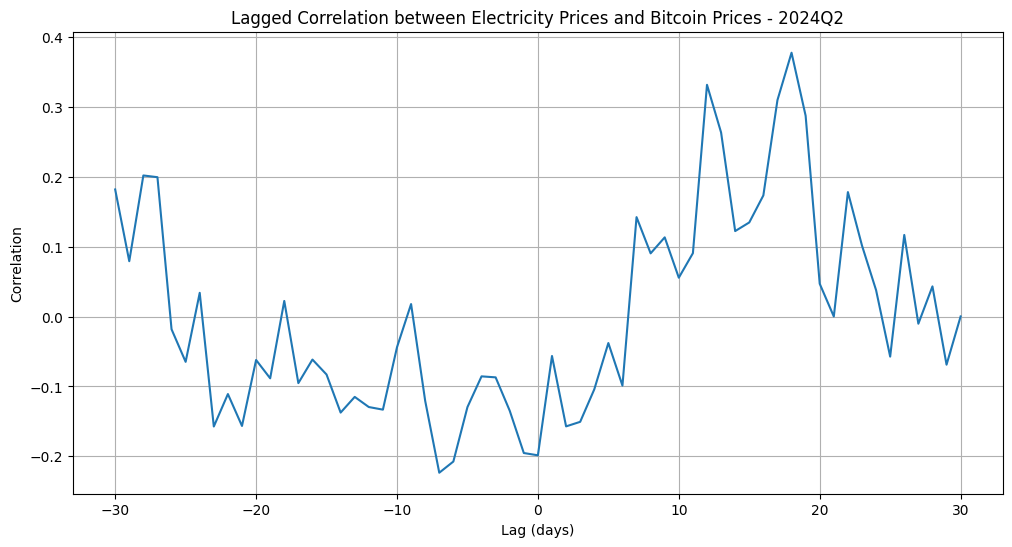

In [37]:
# Segment data into quarterly periods
combined_data['Quarter'] = combined_data.index.to_period('Q')

# Function to calculate lagged correlation
def lagged_correlation(df, lag):
    if lag > 0:
        return df['price'].shift(lag).corr(df['Close'])
    elif lag < 0:
        return df['price'].corr(df['Close'].shift(-lag))
    else:
        return df['price'].corr(df['Close'])

# Calculate lagged correlations for each quarter
max_lag = 30  # Short-term analysis for up to 30 days
quarterly_lagged_correlations = {}

for quarter in combined_data['Quarter'].unique():
    quarter_data = combined_data[combined_data['Quarter'] == quarter]
    correlations = [lagged_correlation(quarter_data, lag) for lag in range(-max_lag, max_lag + 1)]
    quarterly_lagged_correlations[str(quarter)] = correlations

# Plot the lagged correlations for each quarter
for quarter, correlations in quarterly_lagged_correlations.items():
    plt.figure(figsize=(12, 6))
    plt.plot(range(-max_lag, max_lag + 1), correlations)
    plt.xlabel('Lag (days)')
    plt.ylabel('Correlation')
    plt.title(f'Lagged Correlation between Electricity Prices and Bitcoin Prices - {quarter}')
    plt.grid(True)
    plt.show()